# PROBLEM

Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

## Import Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import seaborn as sns
import warnings

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

---
## EXPLORATORY DATA ANALYSIS

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
boston_df.rename(columns = {'Unnamed: 0':"#"}, inplace = True)
boston_df.columns

Index(['#', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

|ACRONYM |MEANING|
--- | --- |
CRIM | per capita crime rate by town|
ZN | proportion of residential land zoned for lots over 25,000 sq.ft.|
INDUS | proportion of non-retail business acres per town.|
CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
NOX | nitric oxides concentration (parts per 10 million)|
RM | average number of rooms per dwelling|
AGE | proportion of owner-occupied units built prior to 1940|
DIS | weighted distances to five Boston employment centres|
RAD | index of accessibility to radial highways|
TAX | full-value property-tax rate per 10,000 dollars |
PTRATIO | pupil-teacher ratio by town|
LSTAT | \% lower status of the population|
MEDV | Median value of owner-occupied homes in 1000's of dollars|

In [5]:
boston_df.describe()

,#,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
boston_df.head()

,#,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.shape

(506, 14)

---
### BOX PLOT ON THE MEDIAN VALUE OF OWNER-OCCUPIED HOMES

#### Making the Boxplot

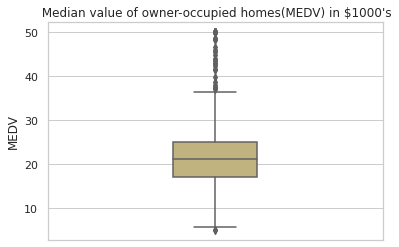

In [8]:
sns.set(rc={"figure.figsize":(7,5)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = None, y = "MEDV", data = boston_df, color = "y", width = 0.25)
ax.set_title(" Median value of owner-occupied homes(MEDV) in $1000's")
plt.show()

**Observations:**
* The minimum value is below 5.
* The maximum value is greater than 35 but less than 40
* The round dots represent outliers,
* The median is over 20 but less than 25

---
### BARPLOT OF TOWNS BORDERING CHARLES RIVER

#### Making the Barplot

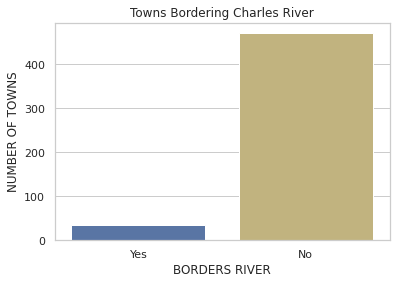

Only 35 towns border Charles River, 471 do not!!


In [10]:
no = sum(boston_df["CHAS"] == 0)
yes = sum(boston_df["CHAS"] == 1)

y = [yes,no]
x = ["Yes", "No"]

my_pal = {"Yes" : 'b', "No":'y'}
x_label = "BORDERS RIVER"
y_label = "NUMBER OF TOWNS"
ax = sns.barplot(x = x, y=y,data = None, palette = my_pal)
ax.set( xlabel = x_label, ylabel = y_label)
ax.set_title("Towns Bordering Charles River")
plt.show()
print(f'Only {yes} towns border Charles River, {no} do not!!')

## Is there a significant difference in the median value of houses bounded by the Charles river or not?

#### Determining equality of variance
- H<sub>o</sub> : Population variances are equal
- H<sub>a</sub> : Population variances are not equal
- α = 0.05

In [10]:
st.levene(boston_df[boston_df["CHAS"]==0]["MEDV"],
          boston_df[boston_df["CHAS"]==1]["MEDV"], center = 'mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

**Result:**

- The p-value of 0.003 is less than 0.05, hence we reject the null hypothesis and fail to reject the alternate hypothesis. 

- Thus, population variances are not equal.

### Performing a T-Test.
#### The hypotheses
- H<sub>o</sub> : ( *µ<sub>1</sub>=µ<sub>2</sub>* ) The means of the median values of houses bordering Charles River and houses that don't border Charles River are equal.
- H<sub>a</sub> : The means of median values of houses bordering Charles River and houses that don't border Charles River are not equal.
- α = 0.05

#### The calculation

In [11]:
st.ttest_ind(boston_df[boston_df["CHAS"]==0]["MEDV"],
             boston_df[boston_df["CHAS"]==1]["MEDV"], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

#### Conclusion
- The p-value of 0.004 is less than 0.05, hence we reject the null hypothesis and fail to reject the alternate hypothesis. 
- Thus there is a difference in the median value of houses for towns bordering Charles River and towns that don't.

---
## BOXPLOT OF MEDIAN VALUE OF OWNER-OCCUPIED HOMES (MEDV) PER AGE GROUP

#### Descritizing the age groups

In [12]:
boston_df.loc[(boston_df["AGE"] <= 35), "age_group"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] >35) & (boston_df["AGE"] <70), "age_group"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >=70), "age_group"] = "70 years and older"

#### Making the Boxplot

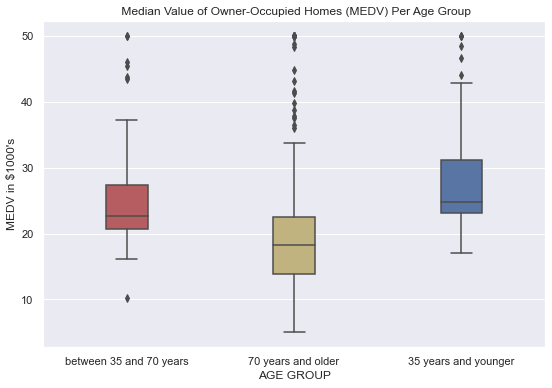

In [13]:
sns.set(rc={"figure.figsize":(9,6)})
x_label = "AGE GROUP"
y_label = "MEDV in $1000's"

my_pal = {"35 years and younger":'b',"between 35 and 70 years":'r',"70 years and older":'y'}
ax = sns.boxplot(x = "age_group", y = "MEDV", data = boston_df, width = 0.25, palette = my_pal)
ax.set( xlabel = x_label, ylabel = y_label)
ax.set_title(" Median Value of Owner-Occupied Homes (MEDV) Per Age Group")
plt.show()

#### Observation:
* Towns with more older houses have a lower median home value.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### The hypotheses
- H<sub>o</sub> : ( *µ<sub>1</sub>=µ<sub>2</sub>=µ<sub>3</sub>* )The means for median values of houses are equal regardless of the age.
- H<sub>a</sub> : The means for median values of houses differ depending on their age.
- α = 0.05

#### The calculation

In [14]:
under_35 = boston_df.loc[boston_df["age_group"]=="35 years and younger"]["MEDV"]
over_70 = boston_df.loc[boston_df["age_group"]=="70 years and older"]["MEDV"]
btn_35_70 = boston_df.loc[boston_df["age_group"]=="between 35 and 70 years"]["MEDV"]

f_statistic, p_value = st.f_oneway(under_35, over_70, btn_35_70)
print(f" F_statistic: {f_statistic}, P-Value: {p_value}")

 F_statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusion
- The p-value of 1.711e-15 is less than 0.05, hence we reject the null hypothesis and fail to reject the alternate hypothesis. 
- Thus the means of the median values of houses differ depending on age of the houses.

---
### SCATTERPLOT OF NITRIC OXIDE CONCENTRATIONS (NOX) VS PROPOTION OF NON-RETAIL BUSINESS ACRES PER TOWN

#### Making the Scatterplot

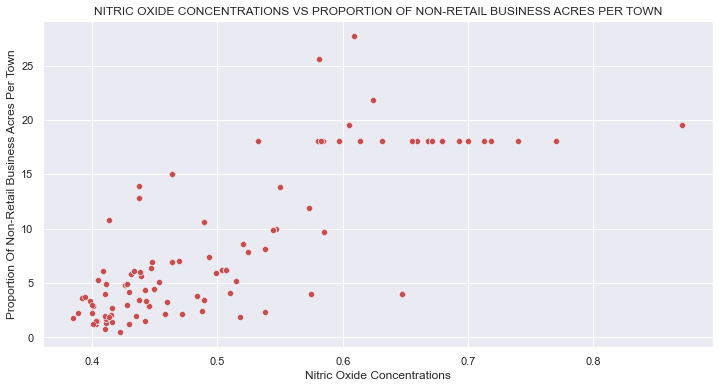

In [15]:
x_label = "Nitric oxide concentrations".title()
y_label = "Proportion of non-retail business acres per town".title()
sns.set(rc={"figure.figsize":(12,6)})
ax = sns.scatterplot(y = "INDUS",x = "NOX", data = boston_df, color = 'r')
ax.set( xlabel = x_label, ylabel = y_label)
ax.set_title("Nitric oxide concentrations Vs Proportion of non-retail business acres per town".upper())

plt.show()

#### Observations:
* As nitric oxide concentrations increase, the proportion of non-retail business acres increases
* Most towns have lower nitric oxide concentrations (less than 0.6) and as a result the proportion of non-retail acres is mostly less than 15

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


#### The hypotheses
- H<sub>o</sub> : There is no relationship between Nitric Oxide Concentrations and the proportion of non-retail business acres in town.
- H<sub>a</sub> : There is a relationship between Nitric Oxide Concentrations and the proportion of non-retail business acres in town.
- α = 0.05

#### The calculation

In [16]:
coef, p_value = st.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Correlation coefficient: {coef}, P-Value: {p_value}")

Correlation coefficient: 0.763651446920915, P-Value: 7.913361061239593e-98


#### Conclusion
-  The p-value of 7.913e-98 is less than 0.05, hence we reject the null hypothesis and fail to reject the alternate hypothesis.
- Thus there exists a relationship between Nitric Oxide Concentrations and the proportion of non-retail business acres in town.
- A correlation coefficient of 0.764 means there is a strong positive relationship between Nitric Oxide Concentrations and the proportion of non-retail business acres in town.

---
### HISTOGRAM OF PUPIL TO TEACHER RATIO

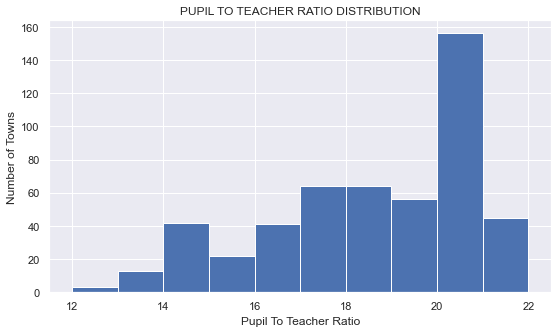

In [17]:
sns.set(rc={"figure.figsize":(9,5)})
ax = boston_df["PTRATIO"].hist(bins = range(12,23,1), grid = True)
ax.set_xlabel("Pupil To Teacher Ratio")
ax.set_ylabel("Number of Towns")
ax.set_title("Pupil To Teacher Ratio Distribution".upper())
plt.show()

#### Observation:
* Most towns have a Pupil to Teacher Ratio above 14

---
## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### The hypotheses
- There is no impact on addition of a weighted distance to the five Boston employment centres on the median value of owner occupied homes
- There is an impact on addition of a weighted distance to the five Boston employment centres on the median value of owner occupied homes

#### Defining our dependent and explanatory variables
- x is our explanatory variable
- y is our dependent variable

In [18]:
x = boston_df["DIS"]
y = boston_df["MEDV"]

#### Adding constants to our x variable

In [19]:
warnings.simplefilter(action='ignore', category=FutureWarning)
x = sm.add_constant(x)

#### Model fitting and making predictions

In [20]:
model = sm.OLS(y,x).fit()
predictions = model.predict(x)

#### Printing out model statistics

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           1.21e-08
Time:                        18:57:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion
- The p-value of 1.21e-08 is less than 0.05, hence we reject the null hypothesis and fail to reject the alternate hypothesis.
- Thus there is an impact on addition of a weighted distance to the five Boston employment centres on the median value of owner occupied homes.
- The R-Squared is 0.062

#### Finding the correlation
- Our correlation, R-value, is the square root of R-Squared from our regression model.

In [22]:
r = np.sqrt(0.062)
print(f"R-Squared: 0.062, R-value: {r}")

R-Squared: 0.062, R-value: 0.24899799195977465


#### Conclusion
- An R value of 0.249 means there is a weak positive correlation between the weighted distance to the five Boston employment centres and the median value of owner occupied homes.
- Thus an additional weighted distance to the five Boston employment centres will result in a slight increase in the median value of owner occupied homes